In [122]:
import pandas as pd
import numpy as np
import math


import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error


import get_data

In [70]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [95]:
train, test = get_data.get_clean_house_data()

In [96]:
train.shape, test.shape

((1460, 331), (1459, 330))

In [105]:
train_X , valid_X, train_y, valid_y = train_test_split(train.drop('SalePrice',axis = 1),train['SalePrice'],
                                                       test_size = 0.3)

In [106]:
model = LinearRegression().fit(train_X,train_y)

In [107]:
# training error
training_error = math.sqrt(mean_squared_error(model.predict(train_X),train_y))

# Validation error
validation_error = math.sqrt(mean_squared_error(model.predict(valid_X),valid_y))
print("Training RMSE is ", training_error,"\nValidation RMSE is ",validation_error)

Training RMSE is  0.0803651253888523 
Validation RMSE is  0.15770397793973195


In [116]:
def adj_r_squared(mode,X,y):
    r_squared = mode.score(X,y)
    n = X.shape[0]
    p = X.shape[1] - 1
    adj_r_squared = 1 - ((1-r_squared) * (n - 1)/(n - p))
    return adj_r_squared



In [120]:
adj_r_sq_train, adj_r_sq_valid = adj_r_squared(model, train_X, train_y), adj_r_squared(model, valid_X, valid_y)
print("Training Adj R Squared is ", adj_r_sq_train,"\nValidation Adj R Squared is ",adj_r_sq_valid)

Training Adj R Squared is  0.9406310165399746 
Validation Adj R Squared is  0.36678074789747894


*<font color = 'blue'>
Takeaway:  
From the RMSE & adjusted R Squared, we can conclude that model is overfitting to training data.
</font>*

In [121]:
from sklearn.linear_model import Ridge

In [143]:
def cv_rmse(model,X,y):
    cv = np.sqrt(-cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5))
    return cv.mean()

In [163]:
# Search for best alpha, based on validation cv
alpha = [0.01, 0.09, 0.3, 0.9, 3, 9, 15, 30,60, 90,150,200, 300, 500, 700, 900]

cv = [cv_rmse(Ridge(alpha = a), train_X, train_y) for a in alpha]


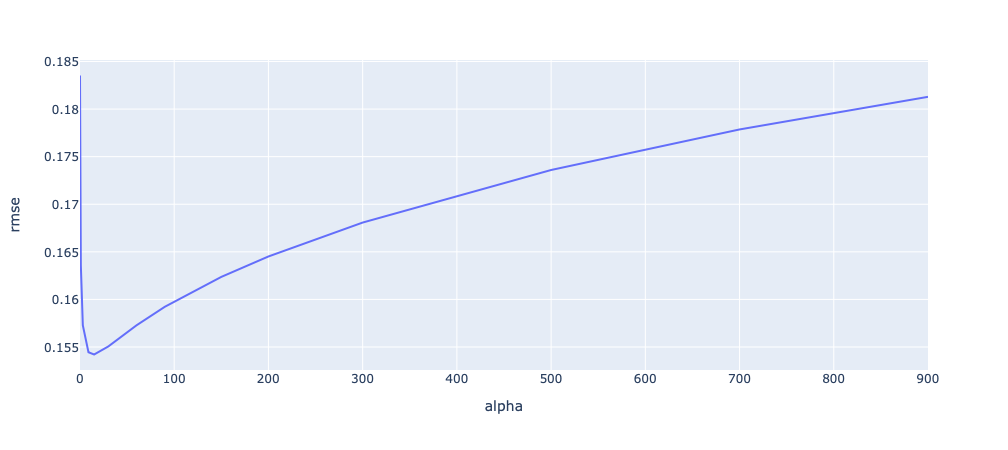

In [169]:
px.line(x=alpha,y=cv,labels={'x':'alpha','y':'rmse'})

Best alpha is 15

In [190]:
model = Ridge(alpha=15).fit(train_X,train_y)

In [191]:
# training error
training_error = math.sqrt(mean_squared_error(model.predict(train_X),train_y))

# Validation error
validation_error = math.sqrt(mean_squared_error(model.predict(valid_X),valid_y))
print("Training RMSE is ", training_error,"\nValidation RMSE is ",validation_error)


Training RMSE is  0.1100635539198655 
Validation RMSE is  0.12768771869935056


In [192]:
adj_r_sq_train, adj_r_sq_valid = adj_r_squared(model, train_X, train_y), adj_r_squared(model, valid_X, valid_y)
print("Training Adj R Squared is ", adj_r_sq_train,"\nValidation Adj R Squared is ",adj_r_sq_valid)

Training Adj R Squared is  0.8886445638145615 
Validation Adj R Squared is  0.5848862969587284
